# Practice PS07: Outlier analysis

<font size="+2" color="blue">Additional results: faster method to find all depths</font>

Author: <font color="blue">Manvir Kaur Singh</font>

E-mail: <font color="blue">manvir.kaur01@estudiant.upf.edu</font>

Date: <font color="blue">3/12/2023</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [2]:
# LEAVE AS-IS

df = pd.read_csv('annthyroid.csv', sep=',')

# Replace the "label" column by an "abnormal" column
df['result'] = df['label'].apply(lambda x: 'abnormal' if x == 1 else 'normal')
df.drop(columns=['label'], inplace=True)

<font size="+1" color="red">Number and percentages of patients in each group.</font>

In [3]:
#total number of patients
total = df.f1.count()
print("The total number of patients is:", total)

#number and percentage of patients with a normal thyroid
normal = df.result[df.result=='normal'].count()
perc_normal = (normal/total)*100
print("The total number of patients with normal thyroid is:", normal ,"and the percentage is:", round(perc_normal))

#number and percentage of patients with a abnormal thyroid
abnormal = df.result[df.result=='abnormal'].count()
perc_abnormal = (abnormal/total)*100
print("The total number of patients with abnormal thyroid is:", abnormal ,"and the percentage is:", round(perc_abnormal))

The total number of patients is: 7200
The total number of patients with normal thyroid is: 6666 and the percentage is: 93
The total number of patients with abnormal thyroid is: 534 and the percentage is: 7


<font size="+1" color="red">Print the 10 normal exams and their centroid, and the first 10 abnormal exams and their centroid.</font>

In [4]:
#first 10 normal exams
normaldf = df[df.result == 'normal']
display(normaldf.head(10))

#"centroid" average of normal exam
f1mean = np.mean(normaldf.f1)
f2mean = np.mean(normaldf.f2)
f3mean = np.mean(normaldf.f3)
f4mean = np.mean(normaldf.f4)
f5mean = np.mean(normaldf.f5)
f6mean = np.mean(normaldf.f6)
print('The centroid of normal exam is: for the first attribute: ', round(f1mean,4), 'second attribute:',round(f2mean,4) ,'third attribute',round(f3mean,4),'fourth attribute:',round(f4mean,4) ,'fifth attribute',round(f5mean,4) ,'sixth attribute:',round(f6mean,4) )

#first 10 abnormal exams
abnormaldf = df[df.result == 'abnormal']
display(abnormaldf.head(10))
#"centroid" average of abnormal exam
f1mean = np.mean(abnormaldf.f1)
f2mean = np.mean(abnormaldf.f2)
f3mean = np.mean(abnormaldf.f3)
f4mean = np.mean(abnormaldf.f4)
f5mean = np.mean(abnormaldf.f5)
f6mean = np.mean(abnormaldf.f6)
print('The centroid of abnormal exam is: for the first attribute: ', round(f1mean,4), 'second attribute:',round(f2mean,4) ,'third attribute',round(f3mean,4),'fourth attribute:',round(f4mean,4) ,'fifth attribute',round(f5mean,4) ,'sixth attribute:',round(f6mean,4) )

,f1,f2,f3,f4,f5,f6,result
0,0.73,0.00060,0.015,0.120,0.082,0.146,normal
1,0.24,0.00025,0.030,0.143,0.133,0.108,normal
2,0.47,0.00190,0.024,0.102,0.131,0.078,normal
3,0.64,0.00090,0.017,0.077,0.090,0.085,normal
4,0.23,0.00025,0.026,0.139,0.090,0.153,normal
5,0.69,0.00025,0.016,0.086,0.070,0.123,normal
6,0.85,0.00025,0.023,0.128,0.104,0.121,normal
7,0.48,0.00208,0.020,0.086,0.078,0.110,normal
8,0.67,0.00130,0.024,0.087,0.109,0.080,normal
9,0.76,0.00010,0.029,0.124,0.128,0.097,normal


The centroid of normal exam is: for the first attribute:  0.5183 second attribute: 0.0021 third attribute 0.0204 fourth attribute: 0.1122 fifth attribute 0.0977 sixth attribute: 0.1161


,f1,f2,f3,f4,f5,f6,result
10,0.62,0.01100,0.0080,0.0730,0.074,0.0980,abnormal
19,0.50,0.06100,0.0096,0.0130,0.116,0.0110,abnormal
27,0.78,0.02500,0.0090,0.0500,0.084,0.0600,abnormal
43,0.61,0.00979,0.0040,0.0810,0.064,0.1260,abnormal
84,0.56,0.00820,0.0200,0.0660,0.094,0.0700,abnormal
105,0.73,0.04700,0.0110,0.0520,0.090,0.0580,abnormal
115,0.43,0.07000,0.0050,0.0029,0.104,0.0028,abnormal
116,0.42,0.03100,0.0080,0.0130,0.119,0.0110,abnormal
145,0.78,0.00630,0.0110,0.0560,0.086,0.0650,abnormal
147,0.53,0.02500,0.0040,0.0390,0.061,0.0640,abnormal


The centroid of abnormal exam is: for the first attribute:  0.548 second attribute: 0.0394 third attribute 0.0149 fourth attribute: 0.0749 fifth attribute 0.0995 sixth attribute: 0.0768


<font size="+1" color="red">Brief comment indicating, based only on the means, which features do you think could be useful for differentiating between normal and abnormal thyroids? Why?</font>

f2, f3, f4 and f6 could be features to differentiating between normal and abnormal thyroids if we look at the centroids. The mean values for f2 is higher in abnormal exams compared to normal exams, while the mean values for f3, f4 and f6 are lower in abnormal exams.

<font size="+1" color="red">Create a scatter matrix as described above.</font>

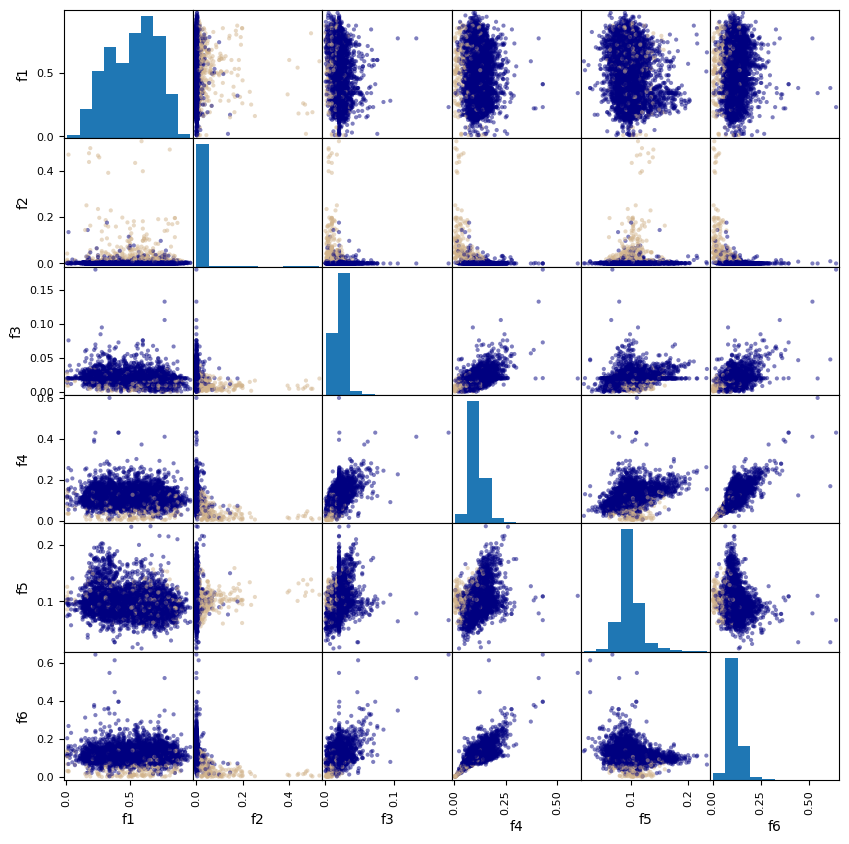

In [5]:
color_code = {'abnormal': 'tan', 'normal': 'navy'}

colors = df['result'].apply(lambda x: color_code[x])

pd.plotting.scatter_matrix(df,figsize=(10, 10), c=colors)
plt.show()

<font size="+1" color="red">Brief commentary on whether you already guess any difference between normal and abnormal exams, based on combinations of features. What are the differences you can appreciate?</font>

These diagonal plots provide a univariate distribution of each feature, showing how the values are distributed along that specific dimension, we have specified that they have to be histograms. the first histograms seems to be left skewed, the second one only has one bin (it suggests that there is no variability in the data, and all observations have the same value or fall within an extremely narrow range). The next 4 seems to have a similar shape. In the scatter plots we can essentially see that in many of them the points of normal exams coincide with the points of the abnormal exams, in some of them where those two colors are very distinguishable we also can see some outliers that are far away from the cluster of each data type.

Feature 2 is the feature with most outliers in general, which happen to be the abnormal ones.

# 1. Create isolation tree

## 1.1. Random dimension and random split

Create a function that returns a random dimension in the dataset. We will ignore some columns, because the random dimension can never be *id* or *result*, but instead should be one of the other dimensions 'f1', 'f2', ..., 'f6'. Do not hard-code these dimensions into your function, instead, read df.columns.

The signature of your function should be `pick_random_dimension(df, columns_to_ignore)`.

Test your function by calling it a few times. It should return a random dimension every time, among the columns of the dataset, excluding the *columns_to_ignore*.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

def pick_random_dimension(df, columns_to_ignore):
    allDim = []
    for column in df.columns:
        if column not in columns_to_ignore:
            allDim.append(column)
            
    return random.choice(allDim)

<font size="+1" color="red">Implement "pick_random_dimension" and a couple of calls to this function.</font>

In [6]:
def pick_random_dimension(df, columns_to_ignore):
    columns = [col for col in df.columns if col not in columns_to_ignore]
    return random.choice(columns)

myDim = pick_random_dimension(df, ['id','result'])
print(myDim)

myDim2 = pick_random_dimension(df, ['id','result'])
print(myDim2)

f2
f4


<font size="+1" color="red">Implement "pick_random_split" and a couple of calls to test this function</font>

In [7]:
def pick_random_split(df, dimension):
    return random.uniform(np.min(df[dimension]),np.max(df[dimension]))
pick_random_split(df, 'f1')
pick_random_split(df, 'f2')

0.4241397279909087

## 1.2. Implement split data into two

<font size="+1" color="red">Implement "split_dataset".</font>

In [8]:
def split_dataset(df, dimension, split):
    dfLow = df[df[dimension] <=split]
    dfHigh = df[df[dimension]>split]
    return dfLow, dfHigh


<font size="+1" color="red">Test "split_dataset", i.e., select a dimension and a cut-off and split the dataset</font>

In [9]:
(left, right) = split_dataset(df, 'f1', 0.5)
display(left)
display(right)

print("Left size:", left.shape[0], "+ right size:", right.shape[0], "=", left.shape[0] + right.shape[0])
print("Total df size:", df.shape[0])

,f1,f2,f3,f4,f5,f6,result
1,0.24,0.00025,0.0300,0.14300,0.133,0.10800,normal
2,0.47,0.00190,0.0240,0.10200,0.131,0.07800,normal
4,0.23,0.00025,0.0260,0.13900,0.090,0.15300,normal
7,0.48,0.00208,0.0200,0.08600,0.078,0.11000,normal
11,0.18,0.00010,0.0230,0.09800,0.085,0.11500,normal
...,...,...,...,...,...,...,...
7171,0.46,0.00170,0.0201,0.13500,0.104,0.12900,normal
7179,0.33,0.00230,0.0201,0.07700,0.083,0.09300,normal
7180,0.30,0.00170,0.0230,0.08300,0.081,0.10200,normal
7192,0.45,0.00077,0.0201,0.11329,0.096,0.11776,normal


,f1,f2,f3,f4,f5,f6,result
0,0.73,0.00060,0.0150,0.120,0.082,0.1460,normal
3,0.64,0.00090,0.0170,0.077,0.090,0.0850,normal
5,0.69,0.00025,0.0160,0.086,0.070,0.1230,normal
6,0.85,0.00025,0.0230,0.128,0.104,0.1210,normal
8,0.67,0.00130,0.0240,0.087,0.109,0.0800,normal
...,...,...,...,...,...,...,...
7194,0.79,0.00490,0.0201,0.077,0.082,0.0940,normal
7195,0.59,0.00250,0.0208,0.079,0.099,0.0800,normal
7196,0.51,0.10600,0.0060,0.005,0.089,0.0055,abnormal
7197,0.51,0.00076,0.0201,0.090,0.067,0.1340,normal


Left size: 3169 + right size: 4031 = 7200
Total df size: 7200


## 1.3. Create one isolation tree

In [10]:
# LEAVE AS-IS

dfi = df.copy()
dfi.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(df))])
dfi

,id,f1,f2,f3,f4,f5,f6,result
0,P0001,0.73,0.00060,0.0150,0.120,0.082,0.1460,normal
1,P0002,0.24,0.00025,0.0300,0.143,0.133,0.1080,normal
2,P0003,0.47,0.00190,0.0240,0.102,0.131,0.0780,normal
3,P0004,0.64,0.00090,0.0170,0.077,0.090,0.0850,normal
4,P0005,0.23,0.00025,0.0260,0.139,0.090,0.1530,normal
...,...,...,...,...,...,...,...,...
7195,P7196,0.59,0.00250,0.0208,0.079,0.099,0.0800,normal
7196,P7197,0.51,0.10600,0.0060,0.005,0.089,0.0055,abnormal
7197,P7198,0.51,0.00076,0.0201,0.090,0.067,0.1340,normal
7198,P7199,0.35,0.00280,0.0201,0.090,0.089,0.1010,normal


<font size="+1" color="red">Implement "isolation_tree".</font>

In [11]:
def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    if len(data) <= min_items:
        return {"contents": data}
    else:
        mydim = pick_random_dimension(data, columns_to_ignore)
        mysplit = pick_random_split(data, mydim)
        (left, right) = split_dataset(data, mydim, mysplit)
        tree['left'] = isolation_tree(left, columns_to_ignore, min_items)
        tree['right'] = isolation_tree(right, columns_to_ignore, min_items)
        tree['dimension'] = mydim
        tree['split'] = mysplit
        return tree   

In [12]:
# LEAVE AS-IS

mytree = isolation_tree(dfi, ['id', 'result'], 2000)

In [13]:
# LEAVE AS-IS

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("<", level+1)
        if self.right:
            ret += self.right.__str__(">", level+1)
        return ret

    def __repr__(self):
        return self.value
    
def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + ' <= ' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [14]:
print(tree_to_nodes(mytree))

:'internal node: f3 <= 0.02'
-<:'internal node: f3 <= 0.02'
--<:'external node: 1132 normal + 245 abnormal'
-->:'internal node: f2 <= 0.45'
---<:'internal node: f5 <= 0.08'
----<:'external node: 272 normal + 7 abnormal'
---->:'internal node: f2 <= 0.18'
-----<:'internal node: f4 <= 0.57'
------<:'internal node: f6 <= 0.08'
-------<:'external node: 160 normal + 56 abnormal'
------->:'internal node: f2 <= 0.02'
--------<:'internal node: f3 <= 0.02'
---------<:'external node: 719 normal + 102 abnormal'
--------->:'internal node: f3 <= 0.02'
----------<:'external node: 261 normal + 14 abnormal'
---------->:'internal node: f3 <= 0.02'
-----------<:'internal node: f2 <= 0.02'
------------<:'internal node: f3 <= 0.02'
-------------<:'external node: 1407 normal + 8 abnormal'
------------->:'external node: 654 normal + 0 abnormal'
------------>:'external node: 3 normal + 2 abnormal'
----------->:'external node: 516 normal + 25 abnormal'
-------->:'external node: 7 normal + 17 abnormal'
------>:

<font size="+1" color="red">Implement `get_max_tree_depth`</font>

In [15]:
def get_max_tree_depth(tree):
    if 'left' not in tree and 'right' not in tree:
        return 1  
    elif 'left' not in tree:
        return 1 + get_max_tree_depth(tree['right'])
    elif 'right' not in tree:
        return 1 + get_max_tree_depth(tree['left'])
    else:
        return 1 + max(get_max_tree_depth(tree['left']), get_max_tree_depth(tree['right']))


<font size="+1" color="red">Test `get_max_tree_depth` on `mytree`.</font>

In [16]:
# Example usage
max_depth = get_max_tree_depth(mytree)
print(f"The maximum depth of the tree is: {max_depth}")

The maximum depth of the tree is: 14


# 2. Create isolation forests and find depth of items



## 2.1. Create an isolation forest

<font size="+1" color="red">Implement "isolation_tree".</font>

In [17]:
def isolation_forest(dfi, columns_to_ignore, min_items, num_trees):
    forest = []
    for _ in range(num_trees):
        tree = isolation_tree(dfi, columns_to_ignore, min_items)
        forest.append(tree)
    return forest

In [18]:
# MODIFY IF YOU SEE THAT IT IMPROVES THE SEPARATION BETWEEN CLASSES

min_items = 50
num_trees = 20

In [19]:
# LEAVE AS-IS

myforest = isolation_forest(dfi, ['id', 'result'], min_items, num_trees)
print("The forest has %d trees" % len(myforest))

The forest has 20 trees


In [20]:
# Leave this code as-is

for i in range(0, 2):
    print("Tree number %d" % i)
    print(tree_to_nodes(myforest[i]))
    print()

Tree number 0
:'internal node: f2 <= 0.10'
-<:'internal node: f4 <= 0.21'
--<:'internal node: f4 <= 0.13'
---<:'internal node: f1 <= 0.66'
----<:'internal node: f6 <= 0.02'
-----<:'external node: 2 normal + 23 abnormal'
----->:'internal node: f4 <= 0.11'
------<:'internal node: f3 <= 0.08'
-------<:'internal node: f5 <= 0.11'
--------<:'internal node: f6 <= 0.10'
---------<:'internal node: f4 <= 0.05'
----------<:'internal node: f2 <= 0.03'
-----------<:'internal node: f6 <= 0.02'
------------<:'external node: 1 normal + 0 abnormal'
------------>:'internal node: f4 <= 0.04'
-------------<:'external node: 18 normal + 6 abnormal'
------------->:'external node: 32 normal + 3 abnormal'
----------->:'external node: 1 normal + 22 abnormal'
---------->:'internal node: f5 <= 0.08'
-----------<:'internal node: f5 <= 0.06'
------------<:'external node: 4 normal + 1 abnormal'
------------>:'internal node: f5 <= 0.07'
-------------<:'external node: 13 normal + 1 abnormal'
------------->:'internal 

## 2.2. Find the average depth of an item

In [21]:
# LEAVE AS-IS

def find_element_depth_aux(tree, column_name, column_value, depth):
    
    if 'contents' in tree:
        # We are in a leaf node
        
        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node
        
        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left
        
def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [22]:
# LEAVE AS-IS

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%s is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))
            
    
print("On shallow tree, having maximum depth %d" % get_max_tree_depth(mytree))
print_sample_depths(dfi, 5, mytree)
print()

print("On first tree of forest, having maximum depth %d" % get_max_tree_depth(myforest[0]))
print_sample_depths(dfi, 5, myforest[0])
print()


On shallow tree, having maximum depth 14
Depths for normal items
- id=P3171 is at depth 13/14
- id=P3816 is at depth 1/14
- id=P3422 is at depth 1/14
- id=P5792 is at depth 13/14
- id=P3839 is at depth 11/14
Depths for abnormal items
- id=P6357 is at depth 1/14
- id=P2571 is at depth 2/14
- id=P1989 is at depth 2/14
- id=P6482 is at depth 9/14
- id=P5508 is at depth 2/14

On first tree of forest, having maximum depth 49
Depths for normal items
- id=P6524 is at depth 23/49
- id=P3433 is at depth 9/49
- id=P4070 is at depth 10/49
- id=P4081 is at depth 18/49
- id=P2821 is at depth 22/49
Depths for abnormal items
- id=P0498 is at depth 14/49
- id=P6209 is at depth 20/49
- id=P3944 is at depth 3/49
- id=P3518 is at depth 15/49
- id=P5558 is at depth 5/49



<font size="+1" color="red">Brief commentary on these depths.</font>

Shallow tree:

    - normal items: Depths for normal items range from 1 to 10 out of 11, indicating that the tree is making distinctions for normal items at various levels. The instances P0266 and P5634 are at the shallowest depth (1/11) and (2/11), while P2305 is at a deeper level (10/11).
    
    - abnormal items: Depths for abnormal items are ranging from 1 to 10 out of 11. The instances P0259, P0407, and P6306 are at the shallowest depth (1/11), while P4968 is at a deeper level (10/11).
    
    
First tree of forest:

    - normal items: Depths for normal items range from 9 to 29 out of 50. This suggests that the first tree in the forest employs a wide range of depths to differentiate between normal instances, with some instances going deeper into the tree (depths 24/50 and 29/50).
    
    - abnormal items: Depths for abnormal items are also spread out, ranging from 8 to 20 out of 50. Similar to normal items, this indicates a diverse use of depths for distinguishing abnormal instances, with some instances going deeper into the tree (depths 16/50 and 20/50).



Deeper depths suggest more complex decision-making for certain instances.

<font size="+1" color="red">Implement "find_average_depth".</font>

In [23]:
def find_average_depth(forest, column_name, value):
    depths = []
    for tree in forest:
        depth = find_element_depth_aux(tree, column_name, value, 0)
        if depth is not None:
            depths.append(depth)
    if len(depths) == 0:
        return 0  # Avoid division by zero
    return sum(depths) / len(depths)


In [24]:
# LEAVE AS-IS

for result in ['normal', 'abnormal']:
    print("Average depths for %s items" % result)
    
    sample = list(dfi[dfi['result'] == result]['id'].sample(5))
    
    for random_id in sample:
        print("- id=%s is at average depth %.1f" % (random_id, find_average_depth(myforest, "id", random_id)))
    
    print()

Average depths for normal items
- id=P0551 is at average depth 20.9
- id=P1344 is at average depth 21.0
- id=P1705 is at average depth 25.1
- id=P3603 is at average depth 27.1
- id=P2342 is at average depth 22.9

Average depths for abnormal items
- id=P6170 is at average depth 18.9
- id=P1621 is at average depth 6.2
- id=P2375 is at average depth 10.3
- id=P7103 is at average depth 16.8
- id=P3606 is at average depth 11.9



<font size="+1" color="red">Brief commentary indicating how would you make the "find_average_depth" function more efficient if you wanted to obtain the average depth of **all** elements. Be concise but be precise, providing pseudocode if you consider it clearer than a text explanation.</font>


I can avoid redundant searches by modifying the function to perform a single pass through each tree in the forest while collecting the depths: 

def find_average_depth(forest, column_name, value):
    total_depth = 0
    count = 0

    for tree in forest:
        depth = find_element_depth_aux(tree, column_name, value, 0)
        if depth is not None:
            total_depth += depth
            count += 1

    if count == 0:
        return 0  

    return total_depth / count
    
    
    
It accumulates the total depth and the count of valid depths in a single pass through the trees.

# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [25]:
# LEAVE AS-IS

abnormal_point_ids = list(dfi[dfi['result'] == 'abnormal']['id'].sample(30))
normal_point_ids = list(dfi[dfi['result'] == 'normal']['id'].sample(30))

print("Normal point sample ids   : %s" % normal_point_ids)
print("Abnormal point sample ids : %s" % abnormal_point_ids)

Normal point sample ids   : ['P6980', 'P3272', 'P0572', 'P0884', 'P6299', 'P6078', 'P5467', 'P4740', 'P2165', 'P2710', 'P0587', 'P0986', 'P7089', 'P6903', 'P1637', 'P3975', 'P4883', 'P0004', 'P3622', 'P0922', 'P2462', 'P6601', 'P0706', 'P1975', 'P1969', 'P4894', 'P1305', 'P7184', 'P1374', 'P2940']
Abnormal point sample ids : ['P3175', 'P3571', 'P1146', 'P3770', 'P5686', 'P4397', 'P3425', 'P3241', 'P1947', 'P0894', 'P5913', 'P6513', 'P5950', 'P6295', 'P5190', 'P0822', 'P3305', 'P0921', 'P5941', 'P6592', 'P6742', 'P1634', 'P4448', 'P6303', 'P5281', 'P7068', 'P6300', 'P6402', 'P4968', 'P3668']


In [26]:
# LEAVE AS-IS

normal_depths = []
print("Depths of items in the 'normal' sample:")
for i in normal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    normal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'normal' sample:
 element id=P6980 is at average depth 23.80
 element id=P3272 is at average depth 23.40
 element id=P0572 is at average depth 37.60
 element id=P0884 is at average depth 19.35
 element id=P6299 is at average depth 26.10
 element id=P6078 is at average depth 20.50
 element id=P5467 is at average depth 19.45
 element id=P4740 is at average depth 25.70
 element id=P2165 is at average depth 21.10
 element id=P2710 is at average depth 19.15
 element id=P0587 is at average depth 15.40
 element id=P0986 is at average depth 20.55
 element id=P7089 is at average depth 22.65
 element id=P6903 is at average depth 22.10
 element id=P1637 is at average depth 37.40
 element id=P3975 is at average depth 13.85
 element id=P4883 is at average depth 26.20
 element id=P0004 is at average depth 22.20
 element id=P3622 is at average depth 17.90
 element id=P0922 is at average depth 19.75
 element id=P2462 is at average depth 27.10
 element id=P6601 is at average dept

In [27]:
# LEAVE AS-IS

abnormal_depths = []
print("Depths of items in the 'abnormal' sample:")
for i in abnormal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    abnormal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'abnormal' sample:
 element id=P3175 is at average depth 13.85
 element id=P3571 is at average depth 14.15
 element id=P1146 is at average depth 14.85
 element id=P3770 is at average depth 14.75
 element id=P5686 is at average depth 10.95
 element id=P4397 is at average depth 17.25
 element id=P3425 is at average depth 12.30
 element id=P3241 is at average depth 21.75
 element id=P1947 is at average depth 22.10
 element id=P0894 is at average depth 13.50
 element id=P5913 is at average depth 9.00
 element id=P6513 is at average depth 18.75
 element id=P5950 is at average depth 21.00
 element id=P6295 is at average depth 18.85
 element id=P5190 is at average depth 16.85
 element id=P0822 is at average depth 20.30
 element id=P3305 is at average depth 16.45
 element id=P0921 is at average depth 17.30
 element id=P5941 is at average depth 9.50
 element id=P6592 is at average depth 21.25
 element id=P6742 is at average depth 15.60
 element id=P1634 is at average dept

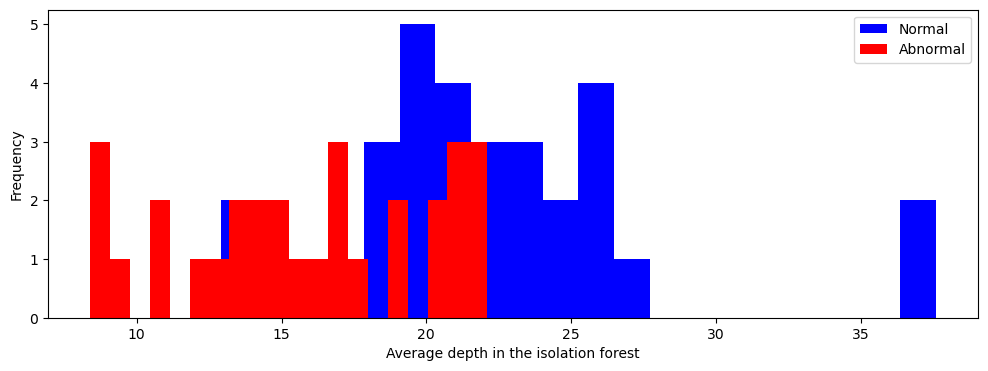

In [28]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths, label='Normal', bins=20, density=False, color='blue')
plt.hist(abnormal_depths, label='Abnormal', bins=20, density=False, color='red')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Brief commentary of what you see in this histogram.</font>

From the beggining to 17.5 average depth in the isolation forest seems to be very similar in both normal and abnormal in terms of frequency, after that there's some changes. The abnormal doesn't reach as far on the average depth as the normal which reaches to more than 25.

The limited extension of the abnormal item distribution beyond a certain depth (not reaching as far as the normal distribution, which extends beyond 25) could suggest that abnormal instances are less likely to be assigned extremely high average depths. This might imply that abnormalities are detected within a certain depth range.

The normal item distribution extending beyond 25 in average depth implies that normal instances are more likely to be isolated or considered dissimilar to the majority of instances in the isolation forest. This might suggest that the majority of normal instances have a unique or distinct pattern.

## 3.2. Compute outlier scores and conclude

In [29]:
# LEAVE AS-IS

# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

In [30]:
# LEAVE AS-IS

def outlier_score_factory():
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score = outlier_score_factory()

normal_scores = [outlier_score(d) for d in normal_depths]
abnormal_scores = [outlier_score(d) for d in abnormal_depths]


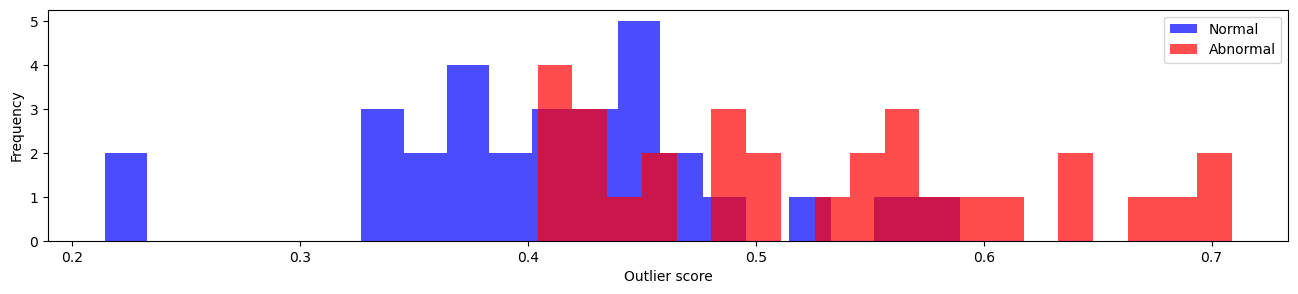

In [31]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores, label='Normal', bins=20, density=False, color='blue', alpha=0.7)
plt.hist(abnormal_scores, label='Abnormal', bins=20, density=False, color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Brief commentary of what you see in this histogram.</font>

The histogram illustrates the distribution of outlier scores for both normal (blue) and abnormal (red) items. Frequency on the y-axis represents how many instances fall within specific ranges of outlier scores.

In this histogram we can see that in some instances normal items have outlier scores that overlap with abnormal items and vice versa. And moreover that normal items have smaller outlier scores, they start at more or less 0.35 while the abnormal start after and finishes after also. Overall the frequencies seems to be similar, but arround 0.4 we can see that normal item has much more frequency, and arrounf 0.45 to 0.5 the abnormal has more frenquency.

From this plot we can see that our threshold will be around 0.5. Even though we will classify some normal as abnormal thryoid, in medical case its safer to be more cautios (doing false positives).

<font size="+1" color="red">Determine an optimal threshold.</font>

In [39]:
from sklearn.metrics import f1_score

all_scores = normal_scores + abnormal_scores
labels = [0] * len(normal_scores) + [1] * len(abnormal_scores)

sorted_indices = sorted(range(len(all_scores)), key=lambda k: all_scores[k])
sorted_scores = [all_scores[i] for i in sorted_indices]
sorted_labels = [labels[i] for i in sorted_indices]

# Binary search for optimal threshold
def find_optimal_threshold(scores, labels):
    left, right = 0, len(scores) - 1

    while left < right:
        mid = (left + right) // 2
        threshold = sorted_scores[mid]
        predicted_labels = [1 if score > threshold else 0 for score in scores]
        f1 = f1_score(labels, predicted_labels)
        
        if f1 > 0.5:
            left = mid + 1
        else:
            right = mid

    return sorted_scores[left]

optimal_threshold = find_optimal_threshold(all_scores, labels)

print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.565814742818859


This approach is using a binary search algorithm to find an optimal threshold for classification based on the F1 score. F1 score is a metric commonly used in classification tasks, especially when dealing with imbalanced datasets. It is the harmonic mean of precision and recall and provides a balance between these two metrics. The code combines outlier scores for normal and abnormal items, sorts them, and performs a binary search to find the threshold maximizing the F1 score. The binary search efficiently narrows down the search space, resulting in the optimal threshold for balanced classification precision and recall.

<font size="+1" color="red">Evaluation of the optimal threshold.</font>

In [41]:
from sklearn.metrics import confusion_matrix

predicted_labels = [1 if score > optimal_threshold else 0 for score in all_scores]

conf_matrix = confusion_matrix(labels, predicted_labels)

tn, fp, fn, tp = conf_matrix.ravel()

fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)


False Positive Rate (FPR): 0.06666666666666667
False Negative Rate (FNR): 0.6666666666666666


**False positive rate** (the probability of saying that a thyroid is abnormal when it is normal), and **false negative rate** (the probability of saying that a thyroid is normal when it is abnormal).

## Extra 

In [42]:
def find_average_depth(forest, column_name, value):
    total_depth = 0
    count = 0

    for tree in forest:
        depth = find_element_depth_aux(tree, column_name, value, 0)
        if depth is not None:
            total_depth += depth
            count += 1

    if count == 0:
        return 0  # Avoid division by zero

    return total_depth / count


In [43]:
abnormal_point_ids = list(dfi[dfi['result'] == 'abnormal']['id'])
normal_point_ids = list(dfi[dfi['result'] == 'normal']['id'])
print("Normal point sample ids   : %s" % normal_point_ids)
print("Abnormal point sample ids : %s" % abnormal_point_ids)

Normal point sample ids   : ['P0001', 'P0002', 'P0003', 'P0004', 'P0005', 'P0006', 'P0007', 'P0008', 'P0009', 'P0010', 'P0012', 'P0013', 'P0014', 'P0015', 'P0016', 'P0017', 'P0018', 'P0019', 'P0021', 'P0022', 'P0023', 'P0024', 'P0025', 'P0026', 'P0027', 'P0029', 'P0030', 'P0031', 'P0032', 'P0033', 'P0034', 'P0035', 'P0036', 'P0037', 'P0038', 'P0039', 'P0040', 'P0041', 'P0042', 'P0043', 'P0045', 'P0046', 'P0047', 'P0048', 'P0049', 'P0050', 'P0051', 'P0052', 'P0053', 'P0054', 'P0055', 'P0056', 'P0057', 'P0058', 'P0059', 'P0060', 'P0061', 'P0062', 'P0063', 'P0064', 'P0065', 'P0066', 'P0067', 'P0068', 'P0069', 'P0070', 'P0071', 'P0072', 'P0073', 'P0074', 'P0075', 'P0076', 'P0077', 'P0078', 'P0079', 'P0080', 'P0081', 'P0082', 'P0083', 'P0084', 'P0086', 'P0087', 'P0088', 'P0089', 'P0090', 'P0091', 'P0092', 'P0093', 'P0094', 'P0095', 'P0096', 'P0097', 'P0098', 'P0099', 'P0100', 'P0101', 'P0102', 'P0103', 'P0104', 'P0105', 'P0107', 'P0108', 'P0109', 'P0110', 'P0111', 'P0112', 'P0113', 'P0114',

In [44]:
normal_depths = []
print("Depths of items in the 'normal' sample:")
for i in normal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    normal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'normal' sample:
 element id=P0001 is at average depth 20.40
 element id=P0002 is at average depth 18.45
 element id=P0003 is at average depth 18.10
 element id=P0004 is at average depth 22.20
 element id=P0005 is at average depth 19.25
 element id=P0006 is at average depth 19.10
 element id=P0007 is at average depth 18.15
 element id=P0008 is at average depth 21.70
 element id=P0009 is at average depth 20.80
 element id=P0010 is at average depth 18.15
 element id=P0012 is at average depth 19.40
 element id=P0013 is at average depth 23.80
 element id=P0014 is at average depth 24.40
 element id=P0015 is at average depth 19.20
 element id=P0016 is at average depth 19.25
 element id=P0017 is at average depth 26.85
 element id=P0018 is at average depth 23.60
 element id=P0019 is at average depth 13.20
 element id=P0021 is at average depth 23.25
 element id=P0022 is at average depth 24.80
 element id=P0023 is at average depth 36.45
 element id=P0024 is at average dept

In [45]:
abnormal_depths = []
print("Depths of items in the 'abnormal' sample:")
for i in abnormal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    abnormal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'abnormal' sample:
 element id=P0011 is at average depth 15.85
 element id=P0020 is at average depth 9.15
 element id=P0028 is at average depth 12.65
 element id=P0044 is at average depth 14.85
 element id=P0085 is at average depth 18.75
 element id=P0106 is at average depth 12.50
 element id=P0116 is at average depth 9.05
 element id=P0117 is at average depth 9.15
 element id=P0146 is at average depth 15.35
 element id=P0148 is at average depth 10.05
 element id=P0156 is at average depth 19.05
 element id=P0209 is at average depth 9.15
 element id=P0216 is at average depth 15.15
 element id=P0259 is at average depth 15.50
 element id=P0290 is at average depth 9.35
 element id=P0344 is at average depth 16.15
 element id=P0359 is at average depth 16.85
 element id=P0388 is at average depth 7.70
 element id=P0407 is at average depth 17.10
 element id=P0430 is at average depth 13.55
 element id=P0463 is at average depth 19.75
 element id=P0488 is at average depth 15

Now, we create an histogram of the depths of normal and abnormal items.

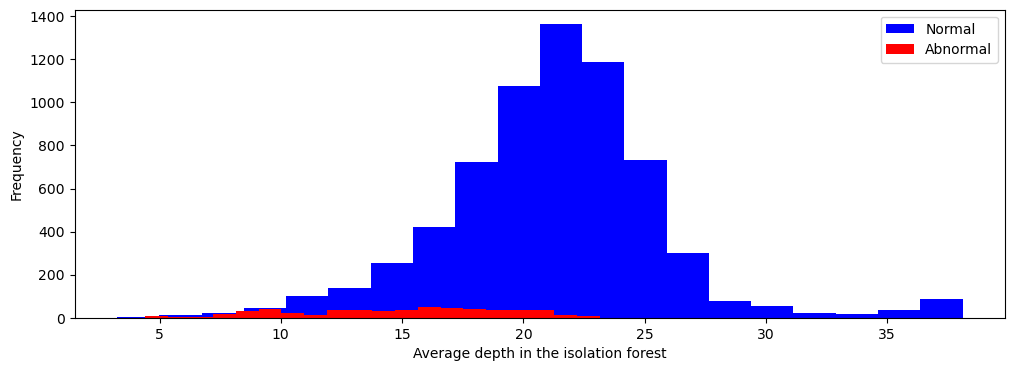

In [46]:
plt.figure(figsize=(12,4))
plt.hist(normal_depths, label='Normal', bins=20, density=False, color='blue')
plt.hist(abnormal_depths, label='Abnormal', bins=20, density=False, color='red')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [56]:
print('Normal' , len(df[df.result == 'abnormal']))
print('Abnormal' , len(df[df.result == 'normal']))

Normal 534
Abnormal 6666


Here we can primarily see normal items which seems to have a normal distibution. Then we can also see the abnormal instances but they are really few. There might be a significant class imbalance in the dataset, with more normal instances than abnormal instances. If the isolation forest is primarily trained on normal instances, it might be biased towards them. We can see that in fact this is true because in total we have 6666 abnormal and 534 abnormal.

Finally, we plot an histogram of outlier scores of normal and abnormal items.


In [47]:
outlier_score = outlier_score_factory()

normal_scores = [outlier_score(d) for d in normal_depths]
abnormal_scores = [outlier_score(d) for d in abnormal_depths]

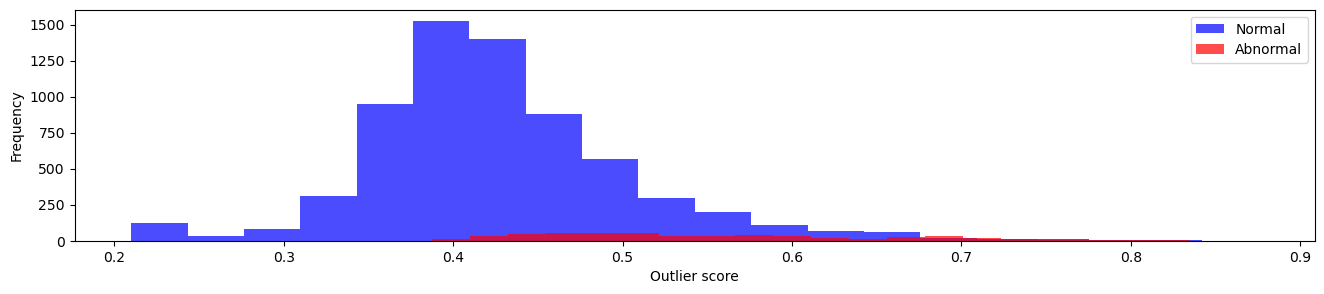

In [48]:
plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores, label='Normal', bins=20, density=False, color='blue', alpha=0.7)
plt.hist(abnormal_scores, label='Abnormal', bins=20, density=False, color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As we have seen in the previous histogram there is a significant class imbalance with more normal instances, the algorithm might focus more on learning the characteristics of the majority class, making it challenging to identify outliers.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>